# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.stats import iqr
import scipy.stats as stats

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [ ]:
# loading the data:
customers = pd.read_csv('Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
customers.isna().sum()

In [ ]:
# Your observations here
#First columns means what channel are products sold for each region. Then we have the sales.
#We should convert Channel and region.


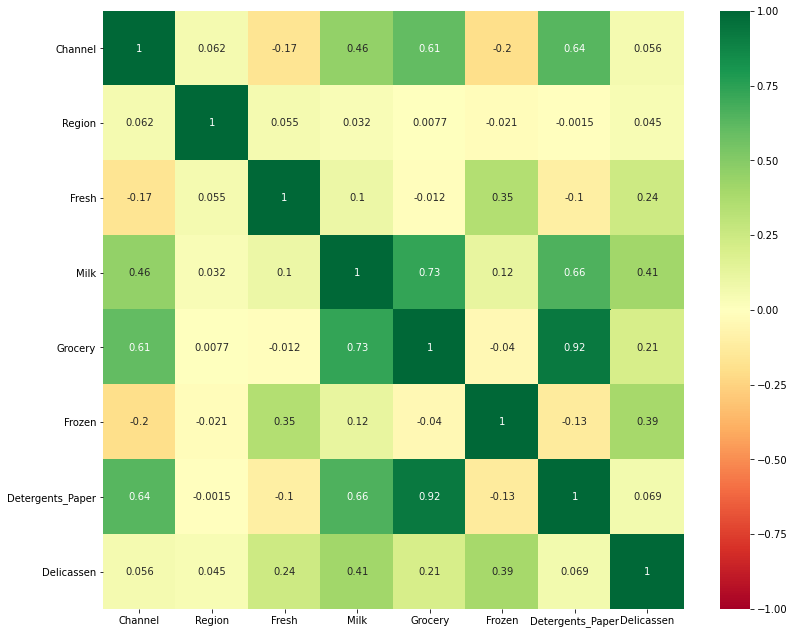

In [4]:
#Let's check correlation
corr=customers.corr()
fig, ax = plt.subplots(figsize = (13,11))
sns.heatmap(corr, cmap = plt.cm.RdYlGn, ax = ax, vmin = -1, vmax = 1, annot=True);

#We can see grocery and detergents are correlated but I wouldn't removed.

In [5]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


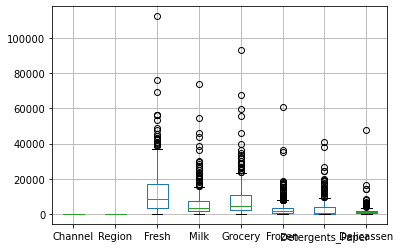

In [6]:
customers.boxplot()

In [7]:
iqr(customers["Fresh"])*1.5+customers["Fresh"].mean()

32709.29772727273

In [8]:
customers = customers[(np.abs(stats.zscore(customers)) < 3).all(axis=1)]

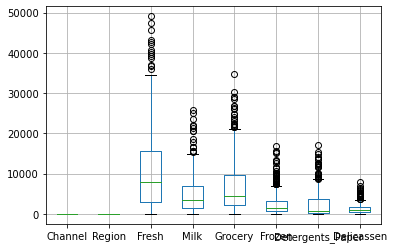

In [9]:
customers.boxplot()

In [10]:
from scipy.stats import skew
for col in customers.columns:
    print(col, customers[col].skew())

Channel 0.8043922080019803
Region -1.300302500285187
Fresh 1.3552416888847096
Milk 1.7295928264103309
Grocery 1.545745054841105
Frozen 2.1348148210923794
Detergents_Paper 1.8737631632666178
Delicassen 2.0499612796809776


In [11]:
customers["Total"]=customers["Fresh"]+customers["Milk"]+customers["Grocery"]+customers["Frozen"]+customers["Detergents_Paper"]+customers["Delicassen"]

customers = customers.sort_values(by="Total",ascending=False)
customers["cumpercentage"] = customers["Total"].cumsum()/customers["Total"].sum()*100




<ipython-input-11-00ec22a13935>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers["Total"]=customers["Fresh"]+customers["Milk"]+customers["Grocery"]+customers["Frozen"]+customers["Detergents_Paper"]+customers["Delicassen"]


In [12]:
customers["count cust"]=1
customers["cum_cust"]=customers["count cust"].cumsum()/customers["count cust"].sum()*100
customers.reset_index(inplace=True)

In [13]:


customers2 = customers.loc[(customers['cum_cust']<=21)]

customers2

#20% of customers represent 38% of sales.

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,cumpercentage,count cust,cum_cust
0,145,2,3,22039,8384,34792,42,12591,4430,82278,0.695891,1,0.241546
1,437,2,3,14531,15488,30243,437,14841,1867,77407,1.350584,1,0.483092
2,435,1,3,29703,12051,16027,13135,182,2204,73302,1.970557,1,0.724638
3,49,2,3,4967,21412,28921,1798,13583,1163,71844,2.578199,1,0.966184
4,427,1,3,31012,16687,5429,15082,439,1163,69812,3.168655,1,1.207729
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,254,1,1,10379,17972,4748,4686,1547,3265,42597,36.936308,1,19.806763
82,403,1,3,25606,11006,4604,127,632,288,42263,37.293760,1,20.048309
83,266,2,1,572,9763,22182,2221,4882,2563,42183,37.650535,1,20.289855
84,226,2,1,20782,5921,9212,1759,2568,1553,41795,38.004029,1,20.531401


In [14]:
customers.drop(["Total","cumpercentage","count cust","cum_cust"],axis=1,inplace=True)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

In [ ]:
# Your comment here
#No Need so far.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [15]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

In [16]:
customers_col = customers.columns.tolist()
customers_col

['index',
 'Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [19]:
customers_scale = pd.DataFrame(customers_scale)

customers_scale.columns =customers_col

customers_scale

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.614740,1.478044,0.587722,1.154975,0.771858,4.338772,-0.860886,3.188189,2.625205
1,1.678427,1.478044,0.587722,0.389426,2.333122,3.633321,-0.725295,3.890255,0.517350
2,1.662720,-0.676570,0.587722,1.936429,1.577764,1.428729,3.633548,-0.683778,0.794505
3,-1.368657,1.478044,0.587722,-0.585760,3.635054,3.428308,-0.258104,3.497722,-0.061632
4,1.599894,-0.676570,0.587722,2.069900,2.596629,-0.214790,4.301895,-0.603587,-0.061632
...,...,...,...,...,...,...,...,...,...
409,-0.724686,-0.676570,0.587722,-0.877990,-0.941268,-1.008015,-0.756532,-0.718726,-0.763153
410,1.034455,-0.676570,0.587722,-1.072844,-0.910939,-0.744692,-0.791203,-0.683154,-0.913656
411,-0.983845,-0.676570,0.587722,-1.040929,-1.046099,-0.936059,-0.568077,-0.723094,-0.909544
412,-0.991698,-0.676570,0.587722,-1.051126,-1.014892,-0.962112,-0.609613,-0.723718,-0.966290


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [55]:
customers_scale.drop(["index"],axis=1,inplace=True)

In [56]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(customers_scale)
kmeans.cluster_centers_
kmeans.labels_

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Count the values in `labels`.

In [57]:
# Your code here:
clusters = kmeans.predict(customers_scale)
pd.Series(clusters).value_counts()


1    287
0    127
dtype: int64

In [58]:
customers["labels"] = kmeans.labels_
customers.head()

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN,labels_DBSCAN2
0,145,2,3,22039,8384,34792,42,12591,4430,0,-1,-1
1,437,2,3,14531,15488,30243,437,14841,1867,0,-1,-1
2,435,1,3,29703,12051,16027,13135,182,2204,1,-1,-1
3,49,2,3,4967,21412,28921,1798,13583,1163,0,-1,-1
4,427,1,3,31012,16687,5429,15082,439,1163,1,-1,-1


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [77]:
# Your code here
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = db.labels_

Count the values in `labels_DBSCAN`.

In [81]:
customers['labels_DBSCAN'].value_counts()

-1    343
 0     71
Name: labels_DBSCAN, dtype: int64

In [83]:
# Your code here
customers.drop(["labels_DBSCAN2"],axis=1,inplace=True)

In [84]:
customers

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,145,2,3,22039,8384,34792,42,12591,4430,0,-1
1,437,2,3,14531,15488,30243,437,14841,1867,0,-1
2,435,1,3,29703,12051,16027,13135,182,2204,1,-1
3,49,2,3,4967,21412,28921,1798,13583,1163,0,-1
4,427,1,3,31012,16687,5429,15082,439,1163,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
409,131,1,3,2101,589,314,346,70,310,1,0
410,355,1,3,190,727,2012,245,184,127,1,0
411,98,1,3,503,112,778,895,56,132,1,0
412,97,1,3,403,254,610,774,54,63,1,0


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

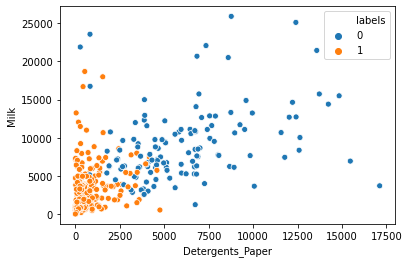

In [64]:
# Your code here:
sns.scatterplot(x='Detergents_Paper',y='Milk',data=customers,hue='labels')

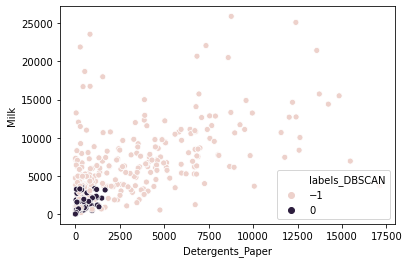

In [68]:
sns.scatterplot(x='Detergents_Paper',y='Milk',data=customers,hue='labels_DBSCAN')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

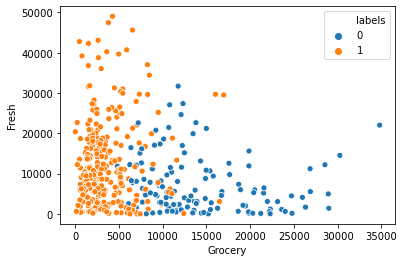

In [69]:
sns.scatterplot(x='Grocery',y='Fresh',data=customers,hue='labels')

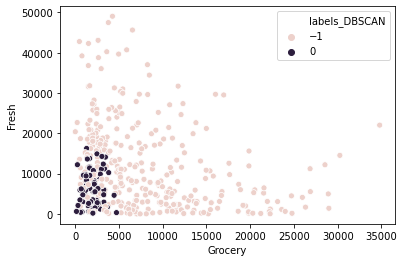

In [70]:
# Your code here:
sns.scatterplot(x='Grocery',y='Fresh',data=customers,hue='labels_DBSCAN')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

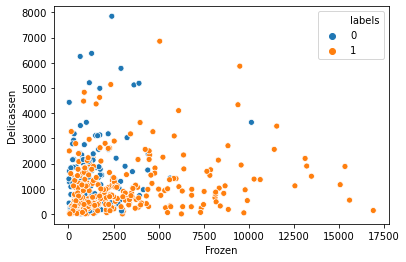

In [66]:
# Your code here:

sns.scatterplot(x='Frozen',y='Delicassen',data=customers,hue='labels')

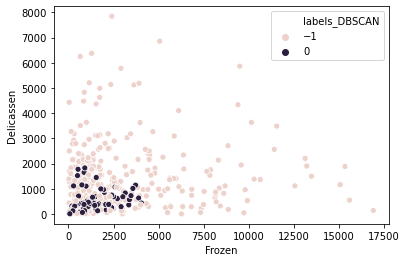

In [67]:
sns.scatterplot(x='Frozen',y='Delicassen',data=customers,hue='labels_DBSCAN')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [75]:
# Your code here:

customers.groupby(customers['labels']).mean()


,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels_DBSCAN,labels_DBSCAN2
labels,,,,,,,,,,,
0,190.543307,1.952756,2.637795,7435.110236,9225.110236,14244.787402,1410.622047,6150.456693,1609.346457,-1.000000,-1.000000
1,237.763066,1.031359,2.508711,12161.703833,2945.595819,3525.874564,3054.038328,702.010453,1073.588850,-0.752613,-0.885017


In [85]:
customers.groupby(customers['labels_DBSCAN']).mean()

,index,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
labels_DBSCAN,,,,,,,,,,
-1,221.632653,1.379009,2.45481,11641.819242,5565.478134,7822.857143,2781.938776,2779.647230,1377.119534,0.629738
0,231.225352,1.000000,3.00000,6218.647887,1521.352113,1940.478873,1428.915493,410.788732,565.563380,1.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here